## Testing polynomial regression:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
# Reading the data set:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/Ruter-data.csv"
df_original = pd.read_csv(url, sep=';')

# filtering:
df = df_original.filter(['Dato','Linjenavn','Passasjerer_Ombord'], axis=1)
df = df[df['Linjenavn'] == '490E']

#preprossesing:
median_passasjerer_ombord = df['Passasjerer_Ombord'].median()
for index, row in df.iterrows():
    if row['Passasjerer_Ombord'] < 0:
        df.loc[index,'Passasjerer_Ombord'] =  median_passasjerer_ombord
        
df["Dato"] = pd.to_datetime(df["Dato"], dayfirst=True)
df["Dato"] = pd.to_numeric(df["Dato"])
df.index = np.arange(0, len(df))

arr = df.groupby('Dato', as_index=False).agg({'Passasjerer_Ombord':'sum'})


<AxesSubplot:xlabel='Dato', ylabel='Passasjerer_Ombord'>

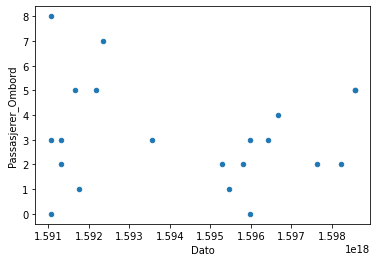

In [8]:
#scatter plot:
df.plot.scatter(x="Dato", y='Passasjerer_Ombord')

MSE = 3.7980988633394226


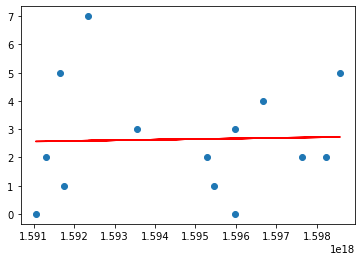

In [9]:
#Model training: 
x = pd.DataFrame(df['Dato'])
y = pd.DataFrame(df['Passasjerer_Ombord'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#first plot linear: 
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color='red')
print( "MSE = "+str(metrics.mean_squared_error(y_train,y_pred)))

MSE = 5.916799999564273


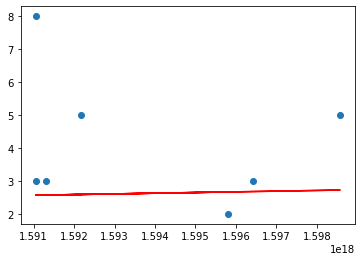

In [10]:
y_pred = linear_regressor.predict(x_test)  # Predict the model on x_test
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
print( "MSE = "+str(metrics.mean_squared_error(y_test,y_pred)))

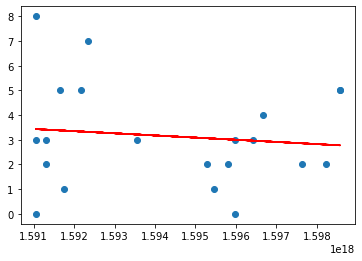

In [11]:
## the models above are not to impresive, then i will try using polynomial regression instead:
from sklearn.preprocessing import PolynomialFeatures
polynomial_reg = PolynomialFeatures(degree = 4)
X_poly = polynomial_reg.fit_transform(x)
lin = LinearRegression()
lin.fit(X_poly, y)

plt.scatter(x, y)
plt.plot(x, lin.predict(polynomial_reg.fit_transform(x)), color='red')